# Lab9 - Spatial Data Analysis
Exploratory spatial data analysis of CitiBike data using pysal and geopandas

<h1 id="tocheading">Table of Contents</h1>
<div id="toc"></div>

In [21]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>

## Import initial libraries

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
from pandas import DataFrame
import matplotlib.pylab as plt

## Working with Shape File

### Loading Census Tract Shape File¶

In [3]:
from geopandas import GeoDataFrame
shape_path="Data/CT_Shape/ct_shape.shp"
ct_shape = GeoDataFrame.from_file(shape_path)
ct_shape.index=ct_shape.BoroCT2010

### Coordinate systems, projections, and transformations 

In [4]:
from fiona.crs import from_epsg
ct_shape.crs = from_epsg(4326) # epsg=4326: lat/on | 26918: NAD83/UTM zone 18N | epsg=2263 is US feet
NYC_Area=ct_shape.to_crs(epsg=2263).geometry.area.sum()/(2.788*10**7) # from ft2 to mi2 
print 'total NYC land area: %s (mi^2)'%str(NYC_Area)[:5] # from ft2 to mi2 #epsg=2263 is US feet

total NYC land area: 302.3 (mi^2)


### Visualize the Cencus Tract boundaries colored by boroughs

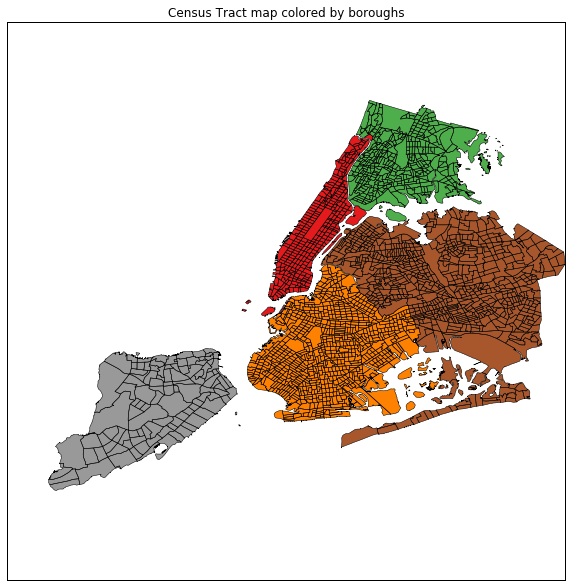

In [5]:
f, ax = plt.subplots(figsize=(10,10))
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
ct_shape.plot(column='BoroCode',alpha=1,linewidth=0.5,ax=ax)
plt.title("Census Tract map colored by boroughs")

### Map NYC Population density

#### Load Census Data for 2010

In [6]:
ct_data=DataFrame.from_csv('Data/ACS_CT2010.csv')
#set index to be the BoroCT2010 code
ct_data.index=ct_data.BoroCT2010.astype(str)

#### Add popuation density to CT shapefile

In [7]:
ct_shape_pop=ct_shape.join(ct_data[['SE_T002_002']]) #SE_T002_002 is population density in social explorer dataset

#### Visualize the Population density for 2010

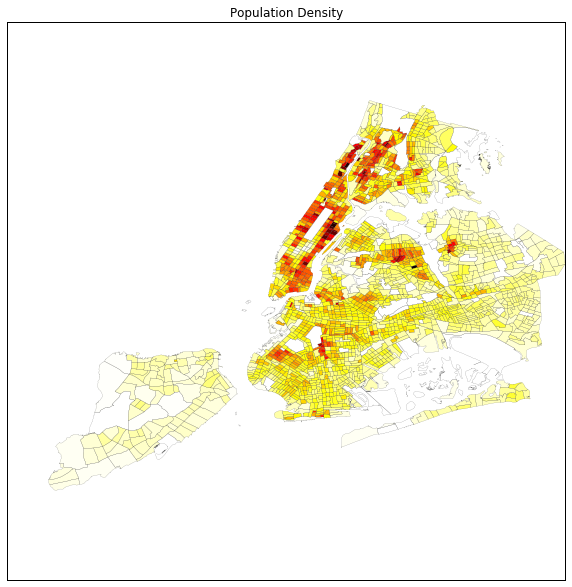

In [8]:
f, ax = plt.subplots(figsize=(10,10))
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
ct_shape_pop.plot(column='SE_T002_002',cmap='hot_r',alpha=1,linewidth=0.1,ax=ax)
plt.title("Population Density")

## Explore CitiBike data

### Load CitiBike data

In [9]:
df_bike_monthly = DataFrame.from_csv('Data/CitiBike_monthly_byStation.csv')
bike_monthly = df_bike_monthly.copy()
bike_monthly.head(2)

,1000,1001,1002,1003,1004,1005,1006,1007,1008,1009,...,1533,1534,1535,1536,1537,1538,1539,1540,1541,1542
starttime,,,,,,,,,,,,,,,,,,,,,
2013-07-31,2343,3914,6979,2750,4914,2229,2183,3139,3622,2368,...,0,0,0,0,0,0,0,0,0,0
2013-08-31,2696,4429,9020,3433,6645,2768,2761,3422,4271,2910,...,0,0,0,0,0,0,0,0,0,0


In [10]:
#bike_month = bike_monthly.index.astype(str)

In [11]:
months = []
for i in bike_monthly.index:
    months.append(i.month)

In [12]:
bike_monthly['month'] = months

In [13]:
summer_bike_monthly = bike_monthly[(bike_monthly.month>5)&(bike_monthly.month<9)]

In [14]:
summer_bike_monthly.head(2)

,1000,1001,1002,1003,1004,1005,1006,1007,1008,1009,...,1534,1535,1536,1537,1538,1539,1540,1541,1542,month
starttime,,,,,,,,,,,,,,,,,,,,,
2013-07-31,2343,3914,6979,2750,4914,2229,2183,3139,3622,2368,...,0,0,0,0,0,0,0,0,0,7
2013-08-31,2696,4429,9020,3433,6645,2768,2761,3422,4271,2910,...,0,0,0,0,0,0,0,0,0,8


In [15]:
winter_bike1 = bike_monthly[(bike_monthly.month <3)]
winter_bike2 = bike_monthly[(bike_monthly.month >10)]
winter_bike_monthly = winter_bike1.append(winter_bike2)

In [16]:
winter_bike_monthly.head(2)

,1000,1001,1002,1003,1004,1005,1006,1007,1008,1009,...,1534,1535,1536,1537,1538,1539,1540,1541,1542,month
starttime,,,,,,,,,,,,,,,,,,,,,
2014-01-31,956,1337,3178,1251,1920,1130,477,1412,1082,681,...,0,0,0,0,0,0,0,0,0,1
2014-02-28,650,960,2920,676,1808,933,508,1045,963,530,...,0,0,0,0,0,0,0,0,0,2


### Time Series Analysis - Summer

/opt/rh/anaconda/root/lib/python2.7/site-packages/ipykernel/__main__.py:6: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.


(-200, 16000)

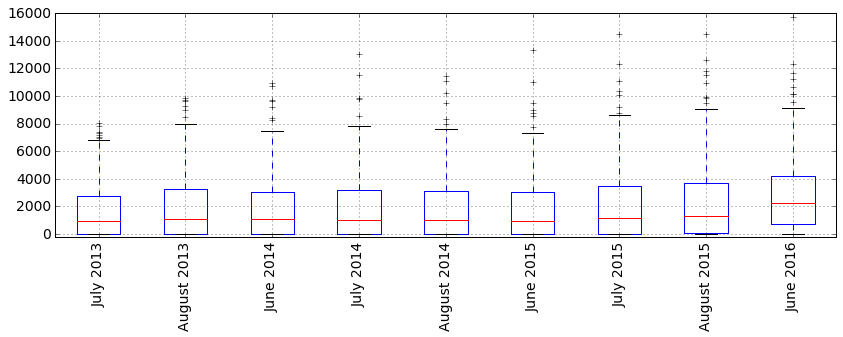

In [17]:
plt.rcParams['font.size']=14
f, ax = plt.subplots(figsize=(14,4))
#create a copy of the df for the viz purposes
summer_bike_monthly_=summer_bike_monthly.copy()
summer_bike_monthly_.index = summer_bike_monthly_.index.strftime("%B %Y")
summer_bike_monthly_.T.boxplot(figsize=(15,7),ax=ax,rot=90);
ax.set_ylim([-200,16000])

In [18]:
### Time Series Analysis - Winter

/opt/rh/anaconda/root/lib/python2.7/site-packages/ipykernel/__main__.py:6: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.


(-200, 16000)

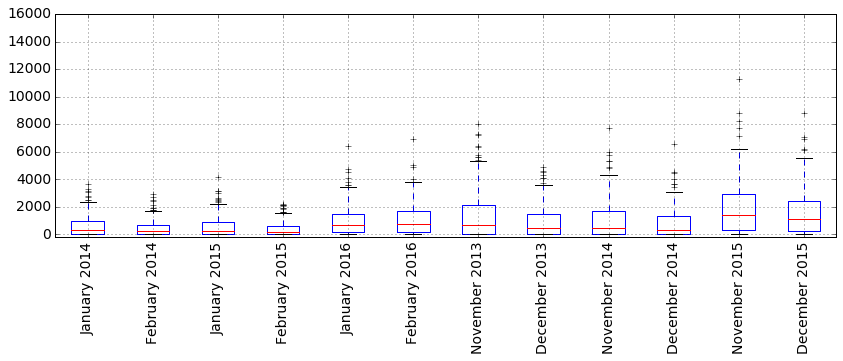

In [19]:
plt.rcParams['font.size']=14
f, ax = plt.subplots(figsize=(14,4))
#create a copy of the df for the viz purposes
winter_bike_monthly_ = winter_bike_monthly.copy()
winter_bike_monthly_.index = winter_bike_monthly_.index.strftime("%B %Y")
winter_bike_monthly_.T.boxplot(figsize=(15,7),ax=ax,rot=90);
ax.set_ylim([-200,16000])

#### Seasonal Decomposition

In [22]:
import statsmodels.api as sm

#Create a monthly time series of bike ride (Average of all citibike stations)
df_new = bike_monthly_.mean(1).resample('M').mean()
df_new.interpolate(inplace=True)

#Seasonal Decomposition using statsmodels api
res = sm.tsa.seasonal_decompose(df_new.dropna())
plt.rcParams['figure.figsize']=(12,8)
resplot = res.plot()

NameError: name 'bike_monthly_' is not defined

## Map CitiBike Data to CT level

### Load CitiBike station location data

In [23]:
station_id=DataFrame.from_csv('Data/Station_id.csv')
#convert station_ids to string index
station_id.index=station_id.index.astype(str)
station_id.head()

,lat,lon
1000,40.753231,-73.970325
1001,40.749718,-74.002950
1002,40.730287,-73.990765
1003,40.718939,-73.992663
1004,40.734927,-73.992005


### Create CitiBike station Geometry (Point) from Coordinates (Lat & Lon)

In [24]:
import shapely
# combine lat and lon to one column
station_id['lonlat']=zip(station_id.lon,station_id.lat)
# Create Point Geometry for based on lonlat column
station_id['geometry']=station_id[['lonlat']].applymap(lambda x:shapely.geometry.Point(x))
station_id.head()

,lat,lon,lonlat,geometry
1000,40.753231,-73.970325,"(-73.97032517, 40.75323098)",POINT (-73.97032517 40.75323098)
1001,40.749718,-74.002950,"(-74.002950346, 40.749717753)",POINT (-74.00295034600001 40.749717753)
1002,40.730287,-73.990765,"(-73.9907647, 40.73028666)",POINT (-73.9907647 40.73028666)
1003,40.718939,-73.992663,"(-73.99266288, 40.71893904)",POINT (-73.99266288 40.71893904)
1004,40.734927,-73.992005,"(-73.99200509, 40.73492695)",POINT (-73.99200509000001 40.73492695)


### Intersect the two geometries

In [25]:
a=[]
# check for each citibike stations to see what CT they are belong to
for i in range(len(station_id)):
    a.append(ct_shape[ct_shape.geometry.intersects(station_id.iloc[i].geometry)].BoroCT2010.values[0])
    print '\r',"%",str((i+1)*100./len(station_id))[:4],
station_id['BoroCT2010']=a

% 100.


In [26]:
station_id.BoroCT2010.head()

1000    1009000
1001    1009900
1002    1005700
1003    1001800
1004    1006100
Name: BoroCT2010, dtype: object

### Add Monthly rides to the station GeoDataFrame with CT code

In [27]:
### Create average monthly rides column from monthly citibike data and add it to the station id which has the geometry
station_id['MonthlyAve']=df_bike_monthly.sum()

In [28]:
station_id.head()

,lat,lon,lonlat,geometry,BoroCT2010,MonthlyAve
1000,40.753231,-73.970325,"(-73.97032517, 40.75323098)",POINT (-73.97032517 40.75323098),1009000,69308
1001,40.749718,-74.002950,"(-74.002950346, 40.749717753)",POINT (-74.00295034600001 40.749717753),1009900,102824
1002,40.730287,-73.990765,"(-73.9907647, 40.73028666)",POINT (-73.9907647 40.73028666),1005700,273525
1003,40.718939,-73.992663,"(-73.99266288, 40.71893904)",POINT (-73.99266288 40.71893904),1001800,101949
1004,40.734927,-73.992005,"(-73.99200509, 40.73492695)",POINT (-73.99200509000001 40.73492695),1006100,184044


In [ ]:
##summer

In [29]:
summer_station_id = station_id.copy()

In [30]:
summer_station_id['MonthlyAve'] = summer_bike_monthly_.sum()

In [31]:
summer_station_id.head()

,lat,lon,lonlat,geometry,BoroCT2010,MonthlyAve
1000,40.753231,-73.970325,"(-73.97032517, 40.75323098)",POINT (-73.97032517 40.75323098),1009000,22422
1001,40.749718,-74.002950,"(-74.002950346, 40.749717753)",POINT (-74.00295034600001 40.749717753),1009900,32869
1002,40.730287,-73.990765,"(-73.9907647, 40.73028666)",POINT (-73.9907647 40.73028666),1005700,87375
1003,40.718939,-73.992663,"(-73.99266288, 40.71893904)",POINT (-73.99266288 40.71893904),1001800,33018
1004,40.734927,-73.992005,"(-73.99200509, 40.73492695)",POINT (-73.99200509000001 40.73492695),1006100,59890


In [32]:
## winter

In [33]:
winter_station_id = station_id.copy()

In [34]:
winter_station_id['MonthlyAve'] = winter_bike_monthly_.sum()

In [35]:
winter_station_id.head()

,lat,lon,lonlat,geometry,BoroCT2010,MonthlyAve
1000,40.753231,-73.970325,"(-73.97032517, 40.75323098)",POINT (-73.97032517 40.75323098),1009000,15034
1001,40.749718,-74.002950,"(-74.002950346, 40.749717753)",POINT (-74.00295034600001 40.749717753),1009900,19059
1002,40.730287,-73.990765,"(-73.9907647, 40.73028666)",POINT (-73.9907647 40.73028666),1005700,57717
1003,40.718939,-73.992663,"(-73.99266288, 40.71893904)",POINT (-73.99266288 40.71893904),1001800,22245
1004,40.734927,-73.992005,"(-73.99200509, 40.73492695)",POINT (-73.99200509000001 40.73492695),1006100,36413


### Add the monthly average rides to the CT shapefile 

In [36]:
# use the 
temp=station_id[['MonthlyAve']]
temp['station_id']=station_id.index
temp.index=station_id['BoroCT2010']
ct_shape_MonthlyAve=ct_shape.join(temp)
ct_shape_MonthlyAve.fillna(0,inplace=True)

/opt/rh/anaconda/root/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


/opt/rh/anaconda/root/lib/python2.7/site-packages/geopandas/plotting.py:225: FutureWarning: 'colormap' is deprecated, please use 'cmap' instead (for consistency with matplotlib)
  "(for consistency with matplotlib)", FutureWarning)


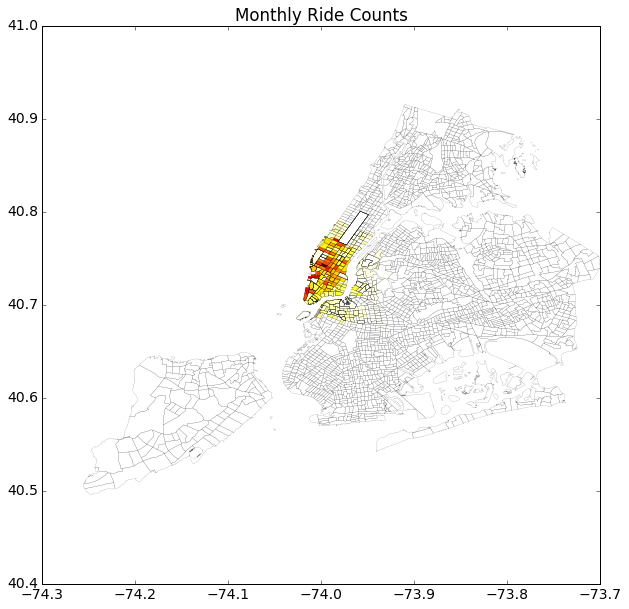

In [37]:
f, ax = plt.subplots(figsize=(10,10))
ct_shape_MonthlyAve.plot(column='MonthlyAve',colormap='hot_r',alpha=1,linewidth=0.1,ax=ax)
plt.title("Monthly Ride Counts")

In [38]:
## Summer

In [39]:
temp_summer = summer_station_id[['MonthlyAve']]
temp_summer['station_id'] = summer_station_id.index
temp_summer.index = summer_station_id['BoroCT2010']
ct_shape_MonthlyAve_summer = ct_shape.join(temp_summer)
ct_shape_MonthlyAve_summer.fillna(0,inplace=True)

/opt/rh/anaconda/root/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


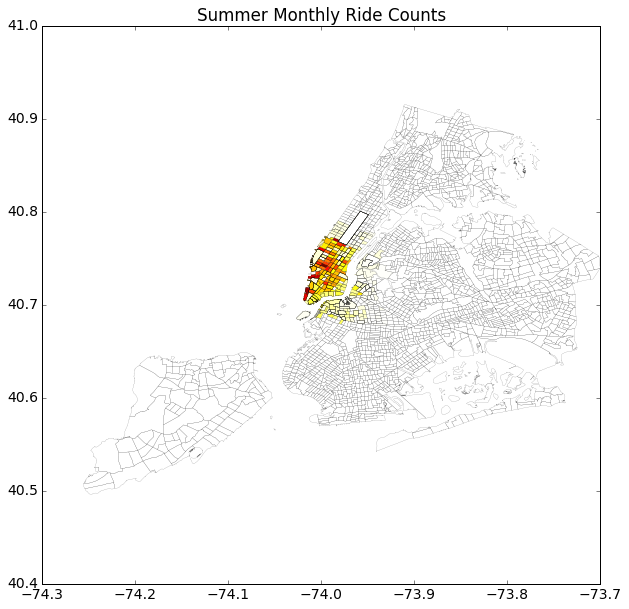

In [40]:
f, ax = plt.subplots(figsize=(10,10))
ct_shape_MonthlyAve_summer.plot(column='MonthlyAve',colormap='hot_r',alpha=1,linewidth=0.1,ax=ax)
plt.title("Summer Monthly Ride Counts")

In [41]:
#Winter

In [42]:
temp_winter = winter_station_id[['MonthlyAve']]
temp_winter['station_id'] = winter_station_id.index
temp_winter.index = winter_station_id['BoroCT2010']
ct_shape_MonthlyAve_winter = ct_shape.join(temp_winter)
ct_shape_MonthlyAve_winter.fillna(0,inplace=True)

/opt/rh/anaconda/root/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


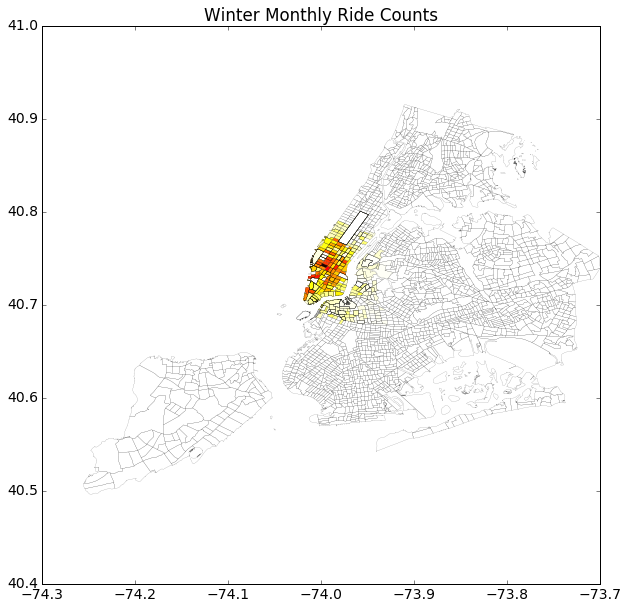

In [43]:
f, ax = plt.subplots(figsize=(10,10))
ct_shape_MonthlyAve_winter.plot(column='MonthlyAve',colormap='hot_r',alpha=1,linewidth=0.1,ax=ax)
plt.title("Winter Monthly Ride Counts")

### Removing the CTs that are out of zoom boundries

In [44]:
# Summer

In [45]:
ct_shape_MonthlyAve_summer_Zoom=(ct_shape_MonthlyAve_summer[ct_shape_MonthlyAve_summer
                           .centroid
                           .apply(lambda c:c.x>-74.1 and c.x<-73.92 and c.y>40.65 and c.y<40.8)])

In [46]:
print "Total number of CTs:", len(ct_shape)
print "Number of zoomed CTs:", len(temp_summer.MonthlyAve)

Total number of CTs: 2166
Number of zoomed CTs: 543


In [47]:
# Winter

In [48]:
ct_shape_MonthlyAve_winter_Zoom=(ct_shape_MonthlyAve_winter[ct_shape_MonthlyAve_winter
                           .centroid
                           .apply(lambda c:c.x>-74.1 and c.x<-73.92 and c.y>40.65 and c.y<40.8)])

In [49]:
print "Total number of CTs:", len(ct_shape)
print "Number of zoomed CTs:", len(temp_winter.MonthlyAve)

Total number of CTs: 2166
Number of zoomed CTs: 543


### Map the monthly rides 

In [50]:
### Summer

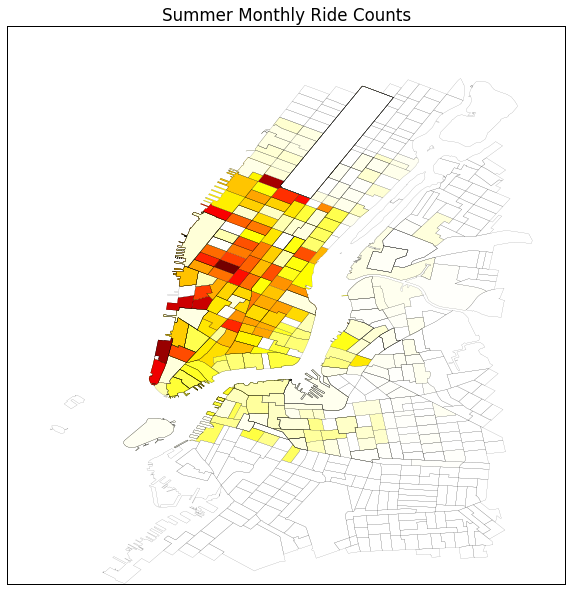

In [51]:
f, ax = plt.subplots(figsize=(10,10))
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
ct_shape_MonthlyAve_summer_Zoom.plot(column='MonthlyAve',colormap='hot_r',alpha=1,linewidth=0.1,ax=ax)
plt.title("Summer Monthly Ride Counts")

In [52]:
## Winter

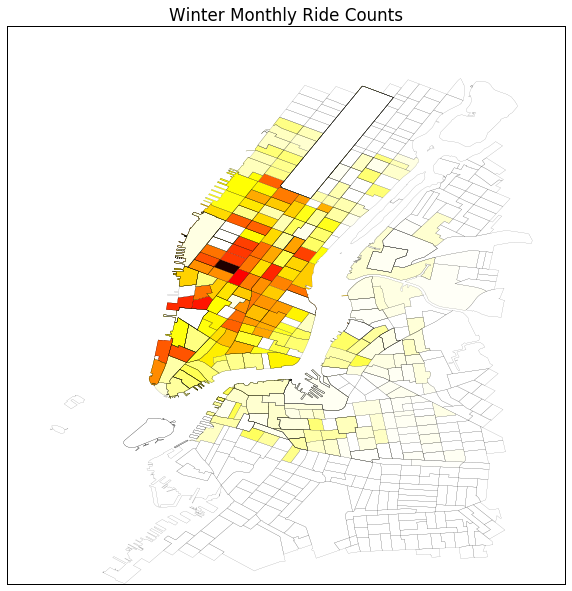

In [57]:
f, ax = plt.subplots(figsize=(10,10))
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
ct_shape_MonthlyAve_winter_Zoom.plot(column='MonthlyAve',cmap='hot_r',alpha=1,linewidth=0.1,ax=ax)
plt.title("Winter Monthly Ride Counts")

### Export Shapefile CTs in the CitiBike Zone

In [54]:
# Summer and Winter

In [55]:
path_summer = 'Output/ct_shape_MonthlyAve_summer_Zoom.shp'
ct_shape_MonthlyAve_summer_Zoom.to_file(path_summer)

In [56]:
path_winter = 'Output/ct_shape_MonthlyAve_winter_Zoom.shp'
ct_shape_MonthlyAve_winter_Zoom.to_file(path_winter)

## Exploratory Geospatial Analysis

In [58]:
import pysal as ps

### Spatial Weights
Contiguity: Queen Weights

In [59]:
# Summer

In [60]:
qW_CT_summer = ps.queen_from_shapefile(path_summer)

('Island id: ', [0])


In [61]:
# winter

In [62]:
qW_CT_winter = ps.queen_from_shapefile(path_winter)

('Island id: ', [0])


#### Neighbors of index10

In [63]:
#Summer

In [64]:
qW_CT_summer[10]

{1: 1.0, 8: 1.0, 9: 1.0, 18: 1.0, 19: 1.0, 30: 1.0, 37: 1.0, 38: 1.0, 39: 1.0}

In [65]:
qW_CT_summer.cardinalities[10]

9

In [66]:
# Winter

In [67]:
qW_CT_winter[10]

{1: 1.0, 8: 1.0, 9: 1.0, 18: 1.0, 19: 1.0, 30: 1.0, 37: 1.0, 38: 1.0, 39: 1.0}

In [68]:
qW_CT_winter.cardinalities[10]

9

#### Matrix of Weights

In [69]:
# Summer

In [70]:
Wmatrix_summer, ids_summer = qW_CT_summer.full()

In [71]:
Wmatrix_summer

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  1., ...,  0.,  0.,  0.],
       [ 0.,  1.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  1.,  0.],
       [ 0.,  0.,  0., ...,  1.,  0.,  1.],
       [ 0.,  0.,  0., ...,  0.,  1.,  0.]])

In [72]:
# Winter

In [73]:
Wmatrix_winter, ids_winter = qW_CT_winter.full()

In [74]:
Wmatrix_winter

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  1., ...,  0.,  0.,  0.],
       [ 0.,  1.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  1.,  0.],
       [ 0.,  0.,  0., ...,  1.,  0.,  1.],
       [ 0.,  0.,  0., ...,  0.,  1.,  0.]])

#### Change the matrix to be row-standardized

In [75]:
# Summer

In [76]:
qW_CT_summer.transform = 'r'

('WARNING: ', 0, ' is an island (no neighbors)')


In [77]:
# Winter

In [78]:
qW_CT_winter.transform = 'r'

('WARNING: ', 0, ' is an island (no neighbors)')


### Spatial Lag  
Similarity of CT neibors can be meseard by means of spatial lag as follow:
$$BikeRideCountLag = \sum_j w_{i,j} BikeRideCount$$

In [79]:
# Summer

In [80]:
MonthlyRide_summer = ct_shape_MonthlyAve_summer_Zoom.MonthlyAve
MonthlyRideLag_summer = ps.lag_spatial(qW_CT_summer, MonthlyRide_summer)

In [81]:
# Winter

In [82]:
MonthlyRide_winter = ct_shape_MonthlyAve_winter_Zoom.MonthlyAve
MonthlyRideLag_winter = ps.lag_spatial(qW_CT_winter, MonthlyRide_winter)

#### Create Quantiles for maping

In [83]:
# Summer

In [84]:
MonthlyRideLagQ10_summer = ps.Quantiles(MonthlyRideLag_summer, k=10)
MonthlyRideLagQ10_summer

                   Quantiles                   
 
  Lower              Upper                Count
            x[i] <=     0.000               159
    0.000 < x[i] <=    49.286                 2
   49.286 < x[i] <=   882.900                78
  882.900 < x[i] <=  2346.833                80
 2346.833 < x[i] <=  5645.067                84
 5645.067 < x[i] <=  8593.933                75
 8593.933 < x[i] <= 19189.030                79
19189.030 < x[i] <= 27831.071                80
27831.071 < x[i] <= 32327.735                79
32327.735 < x[i] <= 49147.643                80

In [85]:
# Winter

In [86]:
MonthlyRideLagQ10_winter = ps.Quantiles(MonthlyRideLag_winter, k=10)
MonthlyRideLagQ10_winter

                   Quantiles                   
 
  Lower              Upper                Count
            x[i] <=     0.000               159
    0.000 < x[i] <=    55.000                 2
   55.000 < x[i] <=   940.492                78
  940.492 < x[i] <=  2324.750                80
 2324.750 < x[i] <=  3633.373                79
 3633.373 < x[i] <=  5248.905                80
 5248.905 < x[i] <= 12207.348                79
12207.348 < x[i] <= 16670.897                80
16670.897 < x[i] <= 20113.292                79
20113.292 < x[i] <= 32377.143                80

#### Map the monthly rides lag

In [87]:
# Summer

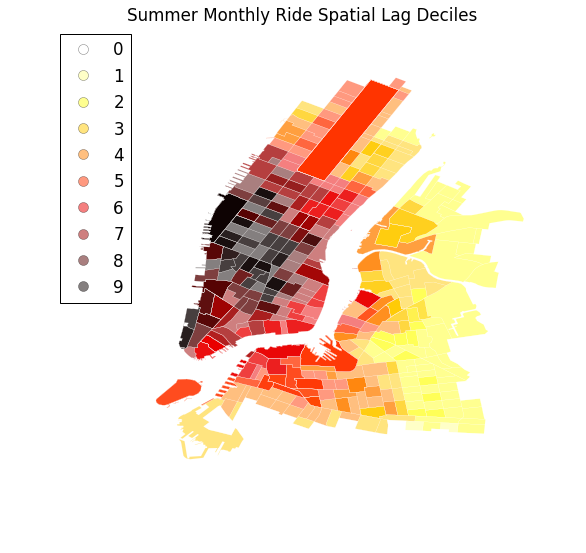

In [88]:
f, ax = plt.subplots(figsize=(9, 9))
ct_shape_MonthlyAve_summer_Zoom.assign(cl=MonthlyRideLagQ10_summer.yb).plot(column='cl', categorical=True, 
        k=10, cmap='hot_r', linewidth=0.1, ax=ax, 
        edgecolor='white', legend=True)
ax.set_axis_off()
plt.title("Summer Monthly Ride Spatial Lag Deciles")

In [89]:
# Winter

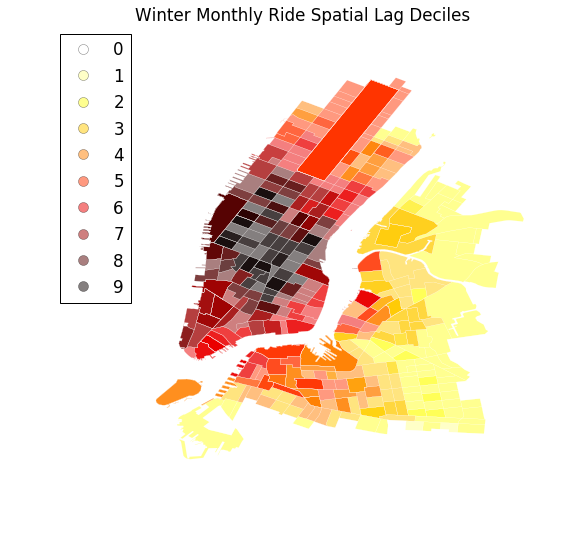

In [90]:
f, ax = plt.subplots(figsize=(9, 9))
ct_shape_MonthlyAve_winter_Zoom.assign(cl=MonthlyRideLagQ10_winter.yb).plot(column='cl', categorical=True, 
        k=10, cmap='hot_r', linewidth=0.1, ax=ax, 
        edgecolor='white', legend=True)
ax.set_axis_off()
plt.title("Winter Monthly Ride Spatial Lag Deciles")

## Global  Spatial Autocorrelation

In [91]:
# Summer

In [92]:
b,a = np.polyfit(MonthlyRide_summer, MonthlyRideLag_summer, 1)
b,a 

(0.64335490815356511, 4220.5552980795601)

In [93]:
# Winter

In [94]:
b,a = np.polyfit(MonthlyRide_winter, MonthlyRideLag_winter, 1)
b,a 

(0.65971839349659711, 2546.8582839204596)

### Moran Scatterplot

In [95]:
# Summer

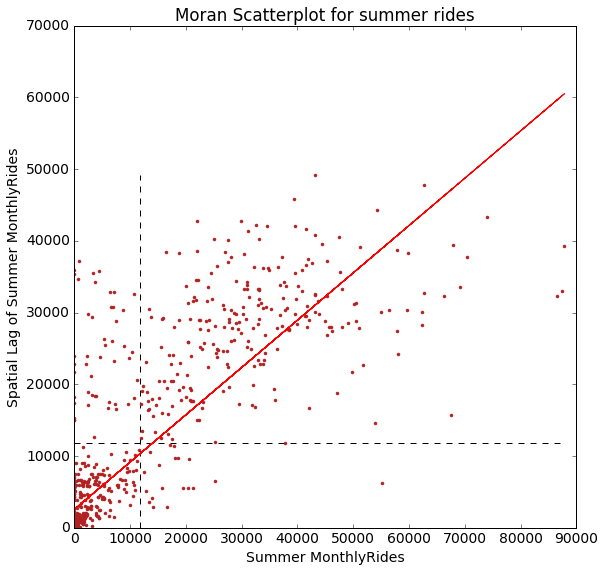

In [96]:
f, ax = plt.subplots(1, figsize=(9, 9))

plt.plot(MonthlyRide_summer, MonthlyRideLag_summer, '.', color='firebrick')

 # dashed vert at mean of the last year's PCI
plt.vlines(MonthlyRide_summer.mean(), MonthlyRideLag_summer.min(), MonthlyRideLag_summer.max(), linestyle='--')
 # dashed horizontal at mean of lagged PCI
plt.hlines(MonthlyRideLag_summer.mean(), MonthlyRide_summer.min(), MonthlyRide_summer.max(), linestyle='--')

# red line of best fit using global I as slope
plt.plot(MonthlyRide_summer, a + b*MonthlyRide_summer, 'r')
plt.title('Moran Scatterplot for summer rides')
plt.ylabel('Spatial Lag of Summer MonthlyRides')
plt.xlabel('Summer MonthlyRides')

In [97]:
# Winter

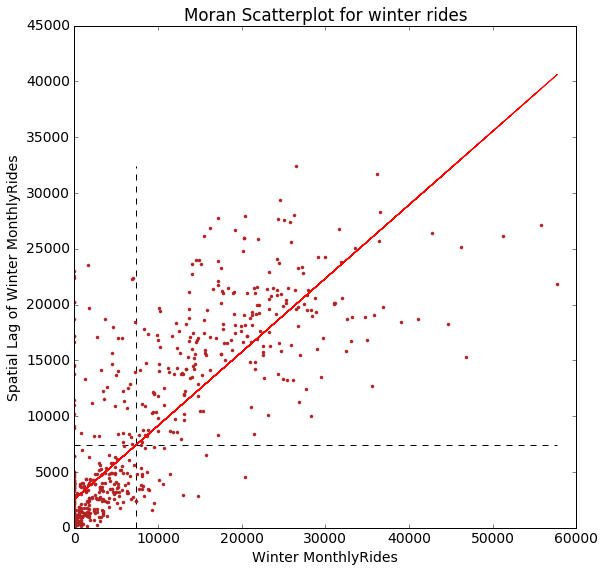

In [98]:
f, ax = plt.subplots(1, figsize=(9, 9))

plt.plot(MonthlyRide_winter, MonthlyRideLag_winter, '.', color='firebrick')

 # dashed vert at mean of the last year's PCI
plt.vlines(MonthlyRide_winter.mean(), MonthlyRideLag_winter.min(), MonthlyRideLag_winter.max(), linestyle='--')
 # dashed horizontal at mean of lagged PCI
plt.hlines(MonthlyRideLag_winter.mean(), MonthlyRide_winter.min(), MonthlyRide_winter.max(), linestyle='--')

# red line of best fit using global I as slope
plt.plot(MonthlyRide_winter, a + b*MonthlyRide_winter, 'r')
plt.title('Moran Scatterplot for winter rides')
plt.ylabel('Spatial Lag of Winter MonthlyRides')
plt.xlabel('Winter MonthlyRides')

### Moran's I

In [99]:
# Summer

In [100]:
I_MonthlyRide_summer = ps.Moran(MonthlyRide_summer, qW_CT_summer)

In [101]:
I_MonthlyRide_summer.I, I_MonthlyRide_summer.p_sim

(0.64353398667011008, 0.001)

In [102]:
print ('Thus, the I statistic is {:.2f} for this data, and has a very small p-value({}).'
       .format(I_MonthlyRide_summer.I,I_MonthlyRide_summer.p_sim))

Thus, the I statistic is 0.64 for this data, and has a very small p-value(0.001).


In [103]:
I_MonthlyRide_summer.sim[0:10]

array([ 0.01393708, -0.02272237,  0.00532393, -0.00421341,  0.01060377,
        0.01963945,  0.00661273, -0.01079344,  0.00630495,  0.0116505 ])

In [104]:
# Winter

In [105]:
I_MonthlyRide_winter = ps.Moran(MonthlyRide_winter, qW_CT_winter)

In [106]:
print ('Thus, the I statistic is {:.2f} for this data, and has a very small p-value({}).'
       .format(I_MonthlyRide_winter.I,I_MonthlyRide_winter.p_sim))

Thus, the I statistic is 0.66 for this data, and has a very small p-value(0.001).


In [107]:
I_MonthlyRide_winter.sim[0:10]

array([ 0.0061777 ,  0.02142497, -0.00552457,  0.00086478, -0.0111272 ,
       -0.00464313, -0.01126998, -0.02429652, -0.00836719,  0.02330985])

### KDEplot of all of the simulated points
the vertical line shows the observed value

In [108]:
import seaborn as sns
plt.rcParams['figure.figsize']=(14,3)

In [109]:
# Summer

(-0.7, 0.7)

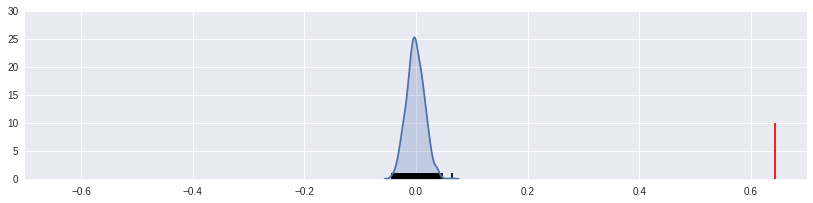

In [110]:
sns.kdeplot(I_MonthlyRide_summer.sim, shade=True)
plt.vlines(I_MonthlyRide_summer.sim, 0, 1)
plt.vlines(I_MonthlyRide_summer.I, 0, 10, 'r')
plt.xlim([-.70, .70])

In the following figure the vertical line is showing if our $I$ statistic were close to our expected value

(-0.7, 0.7)

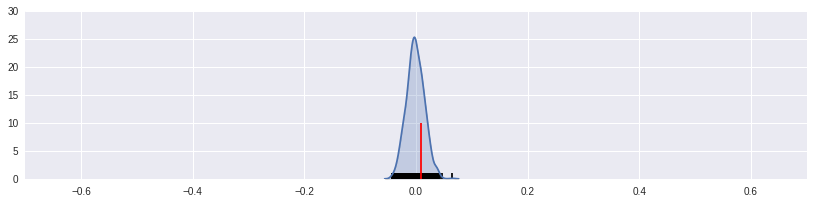

In [111]:
sns.kdeplot(I_MonthlyRide_summer.sim, shade=True)
plt.vlines(I_MonthlyRide_summer.sim, 0, 1)
plt.vlines(I_MonthlyRide_summer.EI+.01, 0, 10, 'r')
plt.xlim([-.70, .70])

In [112]:
# Winter

(-0.7, 0.7)

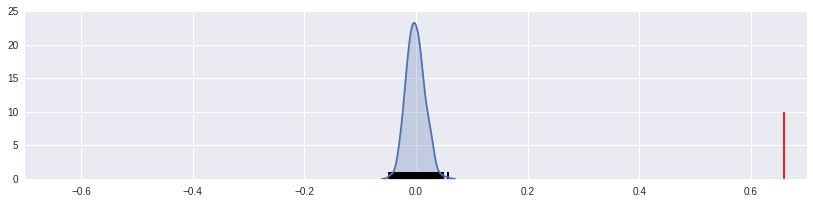

In [113]:
sns.kdeplot(I_MonthlyRide_winter.sim, shade=True)
plt.vlines(I_MonthlyRide_winter.sim, 0, 1)
plt.vlines(I_MonthlyRide_winter.I, 0, 10, 'r')
plt.xlim([-.70, .70])

In the following figure the vertical line is showing if our $I$ statistic were close to our expected value

(-0.7, 0.7)

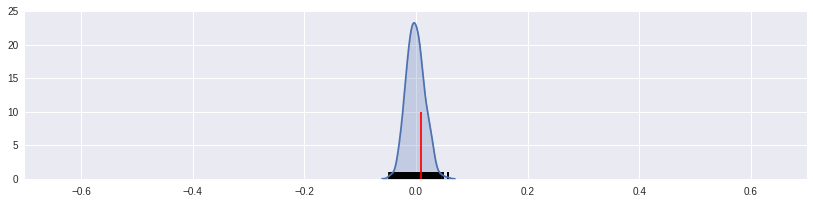

In [114]:
sns.kdeplot(I_MonthlyRide_winter.sim, shade=True)
plt.vlines(I_MonthlyRide_winter.sim, 0, 1)
plt.vlines(I_MonthlyRide_winter.EI+.01, 0, 10, 'r')
plt.xlim([-.70, .70])

## Local  Spatial Autocorrelation

In [115]:
# Summer

In [116]:
LMo_MonthlyRide_summer = ps.Moran_Local(MonthlyRide_summer, qW_CT_summer,permutations=999)

In [117]:
LMo_MonthlyRide_summer.Is[0:5], LMo_MonthlyRide_summer.p_sim[0:5]

(array([-0.        , -0.2391325 ,  0.01474643,  0.00173718,  0.02473794]),
 array([ 0.001,  0.167,  0.331,  0.315,  0.34 ]))

In [118]:
# Winter

In [119]:
LMo_MonthlyRide_winter = ps.Moran_Local(MonthlyRide_winter, qW_CT_winter,permutations=999)

In [120]:
LMo_MonthlyRide_winter.Is[0:5], LMo_MonthlyRide_winter.p_sim[0:5]

(array([-0.        , -0.28793572,  0.00117228, -0.00293475, -0.07146146]),
 array([ 0.001,  0.145,  0.486,  0.495,  0.405]))

### LISA (Local Indicators of Spatial Autocorrelation)

In [121]:
# summer

In [124]:
sigs_summer = MonthlyRide_summer[LMo_MonthlyRide_summer.p_sim <= .001]
W_sigs_summer = MonthlyRideLag_summer[LMo_MonthlyRide_summer.p_sim <= .001]
insigs_summer = MonthlyRide_summer[LMo_MonthlyRide_summer.p_sim > .001]
W_insigs_summer = MonthlyRideLag_summer[LMo_MonthlyRide_summer.p_sim > .001]

In [ ]:
# winter

In [125]:
sigs_winter = MonthlyRide_winter[LMo_MonthlyRide_winter.p_sim <= .001]
W_sigs_winter = MonthlyRideLag_winter[LMo_MonthlyRide_winter.p_sim <= .001]
insigs_winter = MonthlyRide_winter[LMo_MonthlyRide_winter.p_sim > .001]
W_insigs_winter = MonthlyRideLag_winter[LMo_MonthlyRide_winter.p_sim > .001]

### Plot Signficant LISA

In [127]:
# Summer

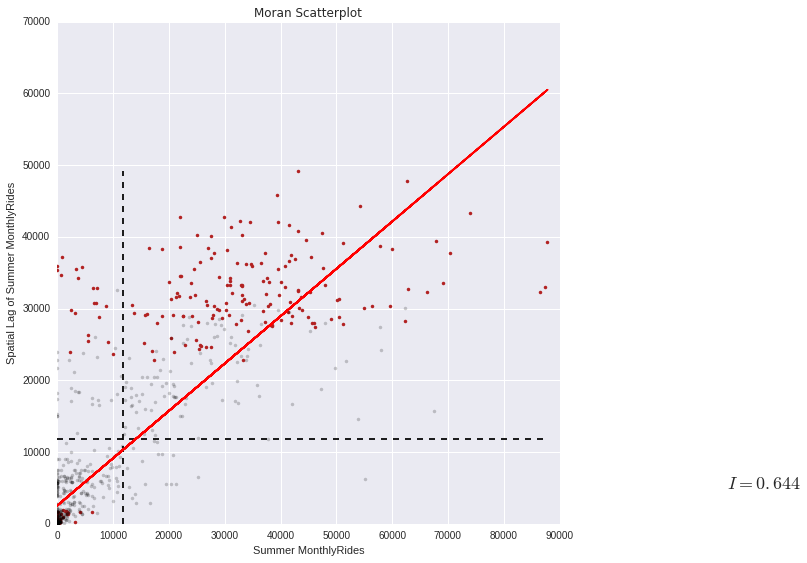

In [132]:
f, ax = plt.subplots(figsize=(9, 9))
plt.plot(sigs_summer, W_sigs_summer, '.', color='firebrick')
plt.plot(insigs_summer, W_insigs_summer, '.k', alpha=.2)
plt.text(s='$I = %.3f$' % I_MonthlyRide_summer.I, x=120000, y=5000, fontsize=18)

 # dashed vert at mean of the last year's PCI
plt.vlines(MonthlyRide_summer.mean(), MonthlyRideLag_summer.min(), MonthlyRideLag_summer.max(), linestyle='--')
 # dashed horizontal at mean of lagged PCI
plt.hlines(MonthlyRideLag_summer.mean(), MonthlyRide_summer.min(), MonthlyRide_summer.max(), linestyle='--')

# red line of best fit using global I as slope
plt.plot(MonthlyRide_summer, a + b*MonthlyRide_summer, 'r')
plt.title('Moran Scatterplot')
plt.ylabel('Spatial Lag of Summer MonthlyRides')
plt.xlabel('Summer MonthlyRides')

In [126]:
# Winter

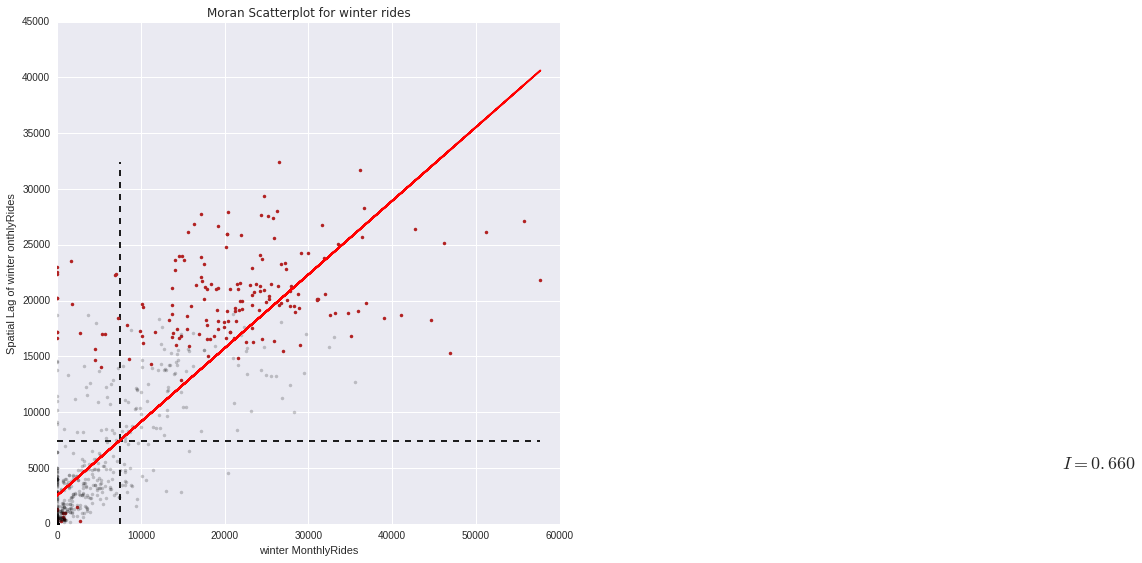

In [136]:
f, ax = plt.subplots(figsize=(9, 9))
plt.plot(sigs_winter, W_sigs_winter, '.', color='firebrick')
plt.plot(insigs_winter, W_insigs_winter, '.k', alpha=.2)
plt.text(s='$I = %.3f$' % I_MonthlyRide_winter.I, x=120000, y=5000, fontsize=18)

 # dashed vert at mean of the last year's PCI
plt.vlines(MonthlyRide_winter.mean(), MonthlyRideLag_winter.min(), MonthlyRideLag_winter.max(), linestyle='--')
 # dashed horizontal at mean of lagged PCI
plt.hlines(MonthlyRideLag_winter.mean(), MonthlyRide_winter.min(), MonthlyRide_winter.max(), linestyle='--')

# red line of best fit using global I as slope
plt.plot(MonthlyRide_winter, a + b*MonthlyRide_winter, 'r')
plt.title('Moran Scatterplot for winter rides')
plt.ylabel('Spatial Lag of winter onthlyRides')
plt.xlabel('winter MonthlyRides')


### Hot and Cold spots 

In [ ]:
sig = LMo_MonthlyRide.p_sim < 0.01
hotspots = LMo_MonthlyRide.q==1 * sig
coldspots = LMo_MonthlyRide.q==3 * sig
print "Number of Hotspots:", hotspots.sum()
print "Number of Coldspots:", coldspots.sum()

In [ ]:
from matplotlib import colors

hcmap = colors.ListedColormap(['grey','red','blue'])
hotcold = hotspots*1 + coldspots*2

f, ax = plt.subplots(figsize=(9, 9))
ct_shape_MonthlyAve_Zoom.assign(cl=hotcold).plot(column='cl', categorical=True, 
        k=10, cmap=hcmap, linewidth=0.1, ax=ax, 
        edgecolor='white', legend=True)
ax.set_axis_off()
plt.title("MonthlyAve Spatial Lag Deciles")